#### Boruvka’s algorithm:

1) Input is a connected, weighted and un-directed graph.

2) Initialize all vertices as individual components (or sets).

3) Initialize MST as empty.

4) While there are more than one components, do following
   for each component.

    - Find the closest weight edge that connects this component to any other component.

    - Add this closest edge to MST if not already added. 
     
5) Return MST.

A spanning tree means all vertices must be connected. So the two disjoint subsets (discussed above) of vertices must be connected to make a Spanning Tree. And they must be connected with the minimum weight edge to make it a Minimum Spanning Tree.

Let us understand the algorithm in the below example. 


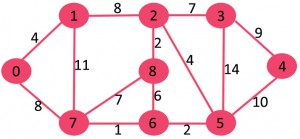

In [2]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Minimum Spanning Tree/img/b1.jpg")

Initially, MST is empty. Every vertex is single component as highlighted in blue color in the below diagram.

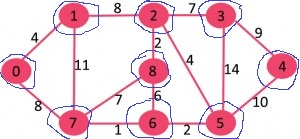

In [3]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Minimum Spanning Tree/img/b2.jpg")

For every component, find the cheapest edge that connects it to some other component. 



In [9]:
"""
Component                Cheapest Edge that connects it to some other component
  {0}                           0-1
  {1}                           0-1
  {2}                           2-8
  {3}                           2-3
  {4}                           3-4
  {5}                           5-6
  {6}                           6-7
  {7}                           6-7
  {8}                           2-8 
    """

'\nComponent                Cheapest Edge that connects it to some other component\n  {0}                           0-1\n  {1}                           0-1\n  {2}                           2-8\n  {3}                           2-3\n  {4}                           3-4\n  {5}                           5-6\n  {6}                           6-7\n  {7}                           6-7\n  {8}                           2-8 \n    '

The cheapest edges are highlighted with green color. Now MST becomes {0-1, 2-8, 2-3, 3-4, 5-6, 6-7}. 

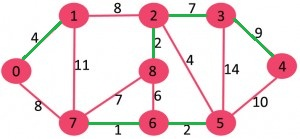

In [4]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Minimum Spanning Tree/img/b3.jpg")

After above step, components are {{0,1}, {2,3,4,8}, {5,6,7}}. The components are encircled with blue color. 

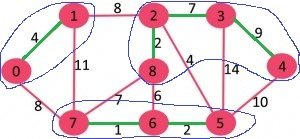

In [5]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Minimum Spanning Tree/img/b4.jpg")

The cheapest edges are highlighted with green color. Now MST becomes {0-1, 2-8, 2-3, 3-4, 5-6, 6-7, 1-2, 2-5} 

In [8]:
"""
Component                Cheapest Edge that connects it to some other component
  {0,1}                        1-2 (or 0-7)
  {2,3,4,8}                    2-5
  {5,6,7}                      2-5
    """

'\nComponent                Cheapest Edge that connects it to some other component\n  {0,1}                        1-2 (or 0-7)\n  {2,3,4,8}                    2-5\n  {5,6,7}                      2-5\n    '

The cheapest edges are highlighted with green color. Now MST becomes {0-1, 2-8, 2-3, 3-4, 5-6, 6-7, 1-2, 2-5} 

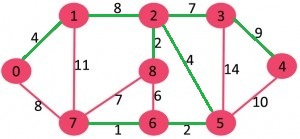

In [6]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Minimum Spanning Tree/img/b5.jpg")

At this stage, there is only one component {0, 1, 2, 3, 4, 5, 6, 7, 8} which has all edges. Since there is only one component left, we stop and return MST.

Implementation: 

Below is the implementation of the above algorithm. The input graph is represented as a collection of edges and union-find data structure is used to keep track of components. 

In [7]:
from collections import defaultdict

class Graph:
	def __init__(self,vertices):
		self.V= vertices
		self.graph = []
		
	def addEdge(self,u,v,w):
		self.graph.append([u,v,w])

	def find(self, parent, i):
		if parent[i] == i:
			return i
		return self.find(parent, parent[i])

	def union(self, parent, rank, x, y):
		xroot = self.find(parent, x)
		yroot = self.find(parent, y)
		if rank[xroot] < rank[yroot]:
			parent[xroot] = yroot
		elif rank[xroot] > rank[yroot]:
			parent[yroot] = xroot
		else :
			parent[yroot] = xroot
			rank[xroot] += 1

	def boruvkaMST(self):
		parent = []; rank = []; 
		cheapest =[]
		numTrees = self.V
		MSTweight = 0
		for node in range(self.V):
			parent.append(node)
			rank.append(0)
			cheapest =[-1] * self.V

		while numTrees > 1:
			for i in range(len(self.graph)):
				u,v,w = self.graph[i]
				set1 = self.find(parent, u)
				set2 = self.find(parent ,v)
				if set1 != set2:	 
					if cheapest[set1] == -1 or cheapest[set1][2] > w :
						cheapest[set1] = [u,v,w] 

					if cheapest[set2] == -1 or cheapest[set2][2] > w :
						cheapest[set2] = [u,v,w]

			for node in range(self.V):
				if cheapest[node] != -1:
					u,v,w = cheapest[node]
					set1 = self.find(parent, u)
					set2 = self.find(parent ,v)

					if set1 != set2 :
						MSTweight += w
						self.union(parent, rank, set1, set2)
						print ("Edge %d-%d with weight %d included in MST" % (u,v,w))
						numTrees = numTrees - 1
			
			cheapest =[-1] * self.V
			
		print ("Weight of MST is %d" % MSTweight)
	
g = Graph(4)
g.addEdge(0, 1, 10)
g.addEdge(0, 2, 6)
g.addEdge(0, 3, 5)
g.addEdge(1, 3, 15)
g.addEdge(2, 3, 4)

g.boruvkaMST()

Edge 0-3 with weight 5 included in MST
Edge 0-1 with weight 10 included in MST
Edge 2-3 with weight 4 included in MST
Weight of MST is 19


##### Time Complexity of Boruvka’s algorithm is O(E log V) 

which is the same as Kruskal’s and Prim’s algorithms.

Boruvka’s algorithm is used as a step in a faster randomized algorithm that works in linear time O(E).

Boruvka’s algorithm is the oldest minimum spanning tree algorithm that was discovered by Boruvka in 1926, long before computers even existed. The algorithm was published as a method of constructing an efficient electricity network.


##### Space complexity: The space complexity of Boruvka’s algorithm is O(V).